<a href="https://colab.research.google.com/github/Konama-Darteh/78702025_Churning_Customers/blob/main/Copy_of_Konama_hairModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model





In [4]:
# For saving the model
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Paths for the training and testing datasets
TRAIN_DIR = '/content/drive/MyDrive/Figaro-1k/Original/Training'
TEST_DIR = '/content/drive/MyDrive/Figaro-1k/Original/Testing'


In [6]:
import os

print(os.listdir('/content/drive/MyDrive/Figaro-1k/Original/Training'))


['Frame00527-org.jpg', 'Frame00121-org.jpg', 'Frame00362-org.jpg', 'Frame00372-org.jpg', 'Frame00188-org.jpg', 'kinky-03.jpg', 'Frame00049-org.jpg', 'Frame00460-org.jpg', 'Frame00257-org.jpg', 'Frame00412-org.jpg', 'Frame01002-org.jpg', 'Frame00143-org.jpg', 'Frame00863-org.jpg', 'Frame00131-org.jpg', 'Frame00198-org.jpg', 'Frame00739-org.jpg', 'Frame00225-org.jpg', 'Frame00402-org.jpg', 'Frame00386-org.jpg', 'Frame00014-org.jpg', 'Frame00811-org.jpg', 'Frame00764-org.jpg', 'Frame00706-org.jpg', 'Frame01012-org.jpg', 'Frame00924-org.jpg', 'Frame00774-org.jpg', 'Frame00396-org.jpg', 'Frame00979-org.jpg', 'Frame00082-org.jpg', 'Frame00651-org.jpg', 'Frame00092-org.jpg', 'Frame00641-org.jpg', 'Frame00059-org.jpg', 'striaght-04.jpg', 'Frame00508-org.jpg', 'Frame00873-org.jpg', 'Frame00235-org.jpg', 'Frame00537-org.jpg', 'Frame00716-org.jpg', 'Frame00693-org.jpg', 'Frame00300-org.jpg', 'Frame00677-org.jpg', 'Frame00484-org.jpg', 'Frame00066-org.jpg', 'Frame00181-org.jpg', 'Frame00494-org.jp

In [7]:
# Parse the dataset into labeled and unlabeled groups
labeled_images = []
unlabeled_images = []

In [8]:
for filename in os.listdir(TRAIN_DIR):
    if "braid" in filename or "curly" in filename or "kinky" in filename or "striaght" in filename or "wavy" in filename or "locs" in filename:
        # Extract the class from the filename (e.g., braid-01 -> braid)
        label = filename.split("-")[0]
        labeled_images.append((os.path.join(TRAIN_DIR, filename), label))
    else:
        unlabeled_images.append(os.path.join(TRAIN_DIR, filename))

In [9]:
# Create DataFrames for easy handling
labeled_df = pd.DataFrame(labeled_images, columns=["image_path", "label"])
unlabeled_df = pd.DataFrame(unlabeled_images, columns=["image_path"])

In [10]:
IMG_HEIGHT, IMG_WIDTH = 128, 128

# Function to preprocess images
def preprocess_images(image_paths, labels=None):
    images = []
    processed_labels = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
        if labels is not None:
            processed_labels.append(labels.pop(0))  # Remove label from the list
    images = np.array(images)
    if labels is not None:
        return images, np.array(processed_labels)
    return images

In [11]:
# Process labeled data
X_labeled, y_labeled = preprocess_images(labeled_df['image_path'].tolist(), labeled_df['label'].tolist())

# Process unlabeled data
X_unlabeled = preprocess_images(unlabeled_df['image_path'].tolist())

In [12]:
# Encode string labels into numeric format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_labeled)



In [13]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
model.fit(X_labeled, y_encoded, epochs=10, batch_size=32)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0323 - loss: 2.1892
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step - accuracy: 0.2903 - loss: 2.9409
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step - accuracy: 0.1613 - loss: 4.1350
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2258 - loss: 3.2481
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2258 - loss: 2.1963
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4194 - loss: 1.6633
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5806 - loss: 1.3692
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3226 - loss: 1.4760
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6774 - loss: 1.1977
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8065 - loss: 1.0004


In [16]:
# Predict labels for unlabeled images
predictions = model.predict(X_unlabeled)
predicted_labels = np.argmax(predictions, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step


In [17]:
# Map numeric labels back to their string values
predicted_labels = label_encoder.inverse_transform(predicted_labels)

In [18]:
# Add predictions to the unlabeled DataFrame
unlabeled_df['predicted_label'] = predicted_labels

In [19]:
# Save the labeled and predicted data for review
output_path = "/content/drive/MyDrive/output_dataset.csv"
unlabeled_df.to_csv(output_path, index=False)

In [20]:
# Correct path for loading the file
output_path = "/content/drive/MyDrive/output_dataset.csv"
labeled_output = pd.read_csv(output_path)

In [21]:
print("Labeled Data:\n", labeled_output)



Labeled Data:
                                             image_path predicted_label
0    /content/drive/MyDrive/Figaro-1k/Original/Trai...           braid
1    /content/drive/MyDrive/Figaro-1k/Original/Trai...            wavy
2    /content/drive/MyDrive/Figaro-1k/Original/Trai...            wavy
3    /content/drive/MyDrive/Figaro-1k/Original/Trai...            wavy
4    /content/drive/MyDrive/Figaro-1k/Original/Trai...            wavy
..                                                 ...             ...
804  /content/drive/MyDrive/Figaro-1k/Original/Trai...            wavy
805  /content/drive/MyDrive/Figaro-1k/Original/Trai...            wavy
806  /content/drive/MyDrive/Figaro-1k/Original/Trai...            wavy
807  /content/drive/MyDrive/Figaro-1k/Original/Trai...            wavy
808  /content/drive/MyDrive/Figaro-1k/Original/Trai...        striaght

[809 rows x 2 columns]


After labeling the images, the CNN and Hairnet models are trained to categories the images based on common characteristics

Load and Preprocess Data

In [22]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/output_dataset.csv')


In [23]:
print(data.columns)


Index(['image_path', 'predicted_label'], dtype='object')


In [24]:
# Extract image paths and labels
image_paths = data['image_path']
labels = data['predicted_label']




In [25]:
# Encode labels into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [39]:
import pickle

# Save the label encoder to a file
with open('/content/drive/MyDrive/label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

print("Label encoder saved successfully!")


Label encoder saved successfully!


In [26]:
# Split data into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.2, random_state=42
)

In [27]:
# Prepare images: Resize and normalize
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    return img_array / 255.0

In [28]:
# Load all images into numpy arrays
train_images = np.array([load_and_preprocess_image(path) for path in train_paths])
val_images = np.array([load_and_preprocess_image(path) for path in val_paths])


In [29]:
# One-hot encode labels
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=len(label_encoder.classes_))
val_labels_one_hot = tf.keras.utils.to_categorical(val_labels, num_classes=len(label_encoder.classes_))

HairNet Model

In [30]:
# Define HairNet model
def create_hairnet_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

hairnet = create_hairnet_model(input_shape=(128, 128, 3), num_classes=len(label_encoder.classes_))
hairnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train HairNet
history_hairnet = hairnet.fit(train_images, train_labels_one_hot,
                              validation_data=(val_images, val_labels_one_hot),
                              epochs=10, batch_size=32)

# Evaluate HairNet
hairnet_eval = hairnet.evaluate(val_images, val_labels_one_hot)
print(f"HairNet Accuracy (Before Fine-tuning): {hairnet_eval[1] * 100:.2f}%")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.3420 - loss: 9.5490 - val_accuracy: 0.2037 - val_loss: 5.3002
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.4184 - loss: 4.7128 - val_accuracy: 0.5617 - val_loss: 3.3767
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.5502 - loss: 1.7651 - val_accuracy: 0.5864 - val_loss: 2.1943
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6706 - loss: 1.2986 - val_accuracy: 0.3086 - val_loss: 2.0881
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6885 - loss: 0.9212 - val_accuracy: 0.6049 - val_loss: 1.3344
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.6655 - loss: 0.9209 - val_accuracy: 0.5309 - val_loss: 1.9368
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7117 - loss: 0.9173 - val_accuracy: 0.6111 - val_loss: 1.4363
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.7567 - loss: 0.6895 - val_accuracy: 0.4815 - val_loss:

CNN model

In [31]:
# Define CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

cnn = create_cnn_model(input_shape=(128, 128, 3), num_classes=len(label_encoder.classes_))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN
history_cnn = cnn.fit(train_images, train_labels_one_hot,
                      validation_data=(val_images, val_labels_one_hot),
                      epochs=10, batch_size=32)

# Evaluate CNN
cnn_eval = cnn.evaluate(val_images, val_labels_one_hot)
print(f"CNN Accuracy (Before Fine-tuning): {cnn_eval[1] * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 601ms/step - accuracy: 0.4367 - loss: 1.9990 - val_accuracy: 0.5926 - val_loss: 1.1225
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 561ms/step - accuracy: 0.6601 - loss: 0.8562 - val_accuracy: 0.7593 - val_loss: 0.6680
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 566ms/step - accuracy: 0.7859 - loss: 0.5495 - val_accuracy: 0.6975 - val_loss: 0.7777
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 527ms/step - accuracy: 0.8460 - loss: 0.4144 - val_accuracy: 0.7778 - val_loss: 0.6275
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 572ms/step - accuracy: 0.9626 - loss: 0.1750 - val_accuracy: 0.7654 - val_loss: 0.7398
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 574ms/step - accuracy: 0.9818 - loss: 0.1022 - val_accuracy: 0.7346 - val_loss: 0.9219
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 560ms/step - accuracy: 0.9902 - loss: 0.0570 - val_accuracy: 0.7778 - val_loss: 0.7561
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 567ms/step - accuracy: 0.9984 - loss: 0.0291 - val_accu

Fine-Tunning the models

Hairnet

In [32]:
# Fine-tune HairNet
hairnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_hairnet_finetune = hairnet.fit(train_images, train_labels_one_hot,
                                       validation_data=(val_images, val_labels_one_hot),
                                       epochs=5, batch_size=32)

hairnet_eval_finetune = hairnet.evaluate(val_images, val_labels_one_hot)
print(f"HairNet Accuracy (After Fine-tuning): {hairnet_eval_finetune[1] * 100:.2f}%")

Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.8749 - loss: 0.3332 - val_accuracy: 0.6420 - val_loss: 1.0269
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9332 - loss: 0.2102 - val_accuracy: 0.6358 - val_loss: 0.9726
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9337 - loss: 0.2292 - val_accuracy: 0.6296 - val_loss: 0.9708
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9408 - loss: 0.1949 - val_accuracy: 0.6667 - val_loss: 0.9575
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9622 - loss: 0.1644 - val_accuracy: 0.6667 - val_loss: 0.9554
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6731 - loss: 0.9600
HairNet Accuracy (After Fine-tuning): 66.67%


CNN

In [33]:
# Fine-tune CNN
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
history_cnn_finetune = cnn.fit(train_images, train_labels_one_hot,
                               validation_data=(val_images, val_labels_one_hot),
                               epochs=5, batch_size=32)

cnn_eval_finetune = cnn.evaluate(val_images, val_labels_one_hot)
print(f"CNN Accuracy (After Fine-tuning): {cnn_eval_finetune[1] * 100:.2f}%")

Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 573ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.7901 - val_loss: 0.8317
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 597ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.7840 - val_loss: 0.8518
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 530ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8086 - val_loss: 0.8524
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 593ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.7840 - val_loss: 1.0305
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 573ms/step - accuracy: 1.0000 - loss: 8.3041e-04 - val_accuracy: 0.7901 - val_loss: 0.9431
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.7999 - loss: 0.8947
CNN Accuracy (After Fine-tuning): 79.01%


Saving the models

In [34]:
# Save the trained CNN model
cnn.save('/content/drive/MyDrive/cnn_model.h5')

# Save the trained HairNet model
hairnet.save('/content/drive/MyDrive/hairnet_model.h5')

print("Models saved successfully!")


Models saved successfully!


VISUALIXATION OF THE MODELS

In [35]:
import matplotlib.pyplot as plt


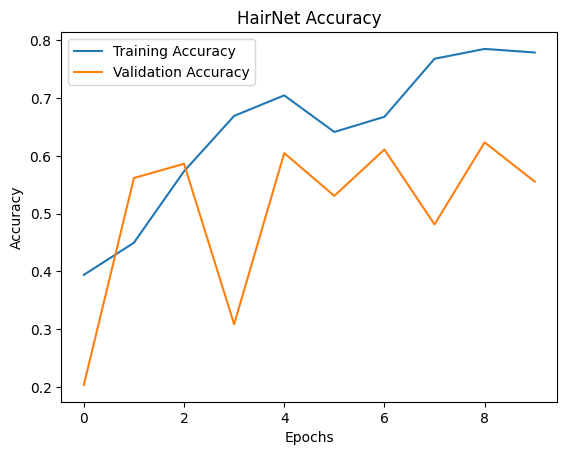

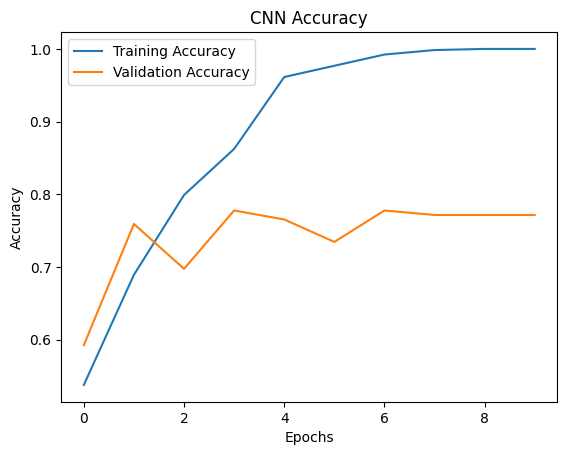

In [36]:
def plot_training_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history_hairnet, "HairNet")
plot_training_history(history_cnn, "CNN")


TESTING HAIR MODEL

In [37]:
#Importing all necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle

Step 2: Load the Saved Models

In [40]:
# Load the saved CNN model
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/cnn_model.h5')

# Load the saved HairNet model
hairnet_model = tf.keras.models.load_model('/content/drive/MyDrive/hairnet_model.h5')

# Load the label encoder
with open('/content/drive/MyDrive/label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)


Step 3: Preprocess a Test Image

In [41]:
# Function to preprocess a single test image
def preprocess_test_image(image_path):
    IMG_HEIGHT, IMG_WIDTH = 128, 128  # Ensure it matches training dimensions
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))  # Load and resize
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    return img_array


Select a Test Image

In [63]:
from google.colab import files
import shutil

# Upload a file
uploaded = files.upload()

# Get the uploaded file name
test_image_path = list(uploaded.keys())[0]

# Move the uploaded file to a known location (optional)
shutil.move(test_image_path, "/content/" + test_image_path)

# Update test_image_path to reflect new location
test_image_path = "/content/" + test_image_path

print(f"Uploaded test image: {test_image_path}")


Saving Frame00583-org.jpg to Frame00583-org.jpg
Uploaded test image: /content/Frame00583-org.jpg


In [64]:
test_image = preprocess_test_image(test_image_path)


Step 5: Make Predictions

In [65]:
# Predict using CNN model
cnn_prediction = cnn_model.predict(test_image)
cnn_predicted_label = np.argmax(cnn_prediction, axis=1)

# Predict using HairNet model
hairnet_prediction = hairnet_model.predict(test_image)
hairnet_predicted_label = np.argmax(hairnet_prediction, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Step 6: Decode the Predictions

In [66]:
# Decode predictions
# Convert the numerical predictions back to their respective class labels.
cnn_predicted_class = label_encoder.inverse_transform(cnn_predicted_label)
hairnet_predicted_class = label_encoder.inverse_transform(hairnet_predicted_label)

print(f"Predicted Hair Type (CNN): {cnn_predicted_class[0]}")
print(f"Predicted Hair Type (HairNet): {hairnet_predicted_class[0]}")


Predicted Hair Type (CNN): kinky
Predicted Hair Type (HairNet): wavy


Step 7: Evaluate the Models on a Test Dataset

In [67]:
# Load test dataset (if preprocessed)
test_images = np.load('/content/drive/MyDrive/test_images.npy')  # Replace with actual path
test_labels = np.load('/content/drive/MyDrive/test_labels.npy')  # Replace with actual path

# Evaluate CNN
cnn_test_accuracy = cnn_model.evaluate(test_images, test_labels, verbose=0)[1]
print(f"CNN Model Test Accuracy: {cnn_test_accuracy * 100:.2f}%")

# Evaluate HairNet
hairnet_test_accuracy = hairnet_model.evaluate(test_images, test_labels, verbose=0)[1]
print(f"HairNet Model Test Accuracy: {hairnet_test_accuracy * 100:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/test_images.npy'